In [387]:
import numpy as np
from uncertainties import ufloat,umath
from matplotlib.patches import Ellipse

import matplotlib.pyplot as plt

# Estimation of Errors in Ellipse Fitting

## Ellipse Fitting
An ellipse is a special case of a general conic section described by

$$F(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0$$

with the constraint $b^2 - 4ac < 0$.

In [388]:
# generating a noisy ellipse
def generate(a,b,center=(0,0),n=100,phi=0,weight=0.2):
    t = np.linspace(0,2*np.pi,n)[:-1]
    x = a*np.cos(t)*np.cos(phi) - b*np.sin(t)*np.sin(phi) + center[0]
    y = a*np.cos(t)*np.sin(phi) + b*np.sin(t)*np.cos(phi) + center[1]
    x += np.random.randn(len(t))*weight
    y += np.random.randn(len(t))*weight
    return x,y

2.607823991300505 1.4667002536011795 [2.7913013  2.73931612] 1.9007356427967286


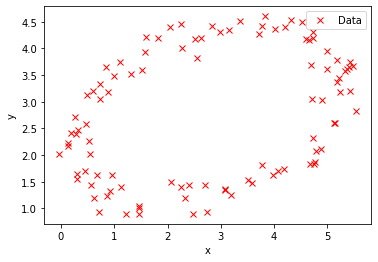

In [389]:
# generate a noisy ellipse with random parameters
minor = np.random.uniform(1,5)
major = np.random.uniform(minor,8)
center = np.random.uniform(-5,5,size=2)
angle = np.random.uniform(0,np.pi)
print(major,minor,center,angle)

x,y = generate(minor,major,center,100,angle)

# plot of generated ellipse
fig,ax = plt.subplots()
ax.plot(x,y,'xr',label='Data')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

Fitzgibbon, Pilu, & Fisher (1996) proposed that the ellipse-specific fitting problem can be reformulated as 

$$\min_{\bf{a}} \lVert{\bf{D}a}\rVert^2 \text{ subject to } \bf{a}^T\bf{Ca} = 1$$

where $\bf{a} = \begin{pmatrix}a,b,c,d,e,f\end{pmatrix}^T$, the design matrix $\bf{D}$ representing the least squares minimization 

$$\bf{D} = \begin{pmatrix}x_1^2 & x_1y_1 & y_1^2 & x_1 & y_1 & 1 \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ x_i^2 & x_iy_i & y_i^2 & x_i & y_i & 1 \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ x_N^2 & x_Ny_N & y_N^2 & x_N & y_N & 1\end{pmatrix}$$
and the constraint matrix $\bf{C}$ 

$$\bf{C} = \begin{pmatrix}0 & 0 & 2 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 & 0 & 0 \\ 2 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0\end{pmatrix}$$

The minimization problem can be reduced by using Lagrange multipliers, giving the two important relations,

$$\begin{align*}
\bf{Sa} &= \lambda \bf{Ca}\\
\bf{a}^T\bf{Ca} &= 1
\end{align*}$$

where $\bf{S} = \bf{D}^T\bf{D}$ or $S_{ab} = \sum_{i=1}^N x_i^ay_i^b$. There will be 6 solutions for $\lambda$, and the minimal positive value corresponds to the ellipse solution. 

Halir & Flusser (1998) improves and numerically simplifies the method further. First, the design matrix $\bf{D}$ is decomposed as $\bf{D} = (\bf{D}_1 | \bf{D}_2)$ where $\bf{D}_1$ and $\bf{D}_2$ are the quadratic and linear parts respectively, expressed as 
$$\bf{D}_1 = \begin{pmatrix}x_1^2 & x_1y_1 & y_1^2 \\ \vdots & \vdots & \vdots \\ x_i^2 & x_iy_i & y_i^2 \\\vdots & \vdots & \vdots \\ x_N^2 & x_Ny_N & y_N^2\end{pmatrix}, \quad\bf{D}_2 = \begin{pmatrix}x_1 & y_1 & 1 \\ \vdots & \vdots & \vdots \\ x_i & y_i & 1 \\\vdots & \vdots & \vdots \\ x_N & y_N & 1\end{pmatrix}$$

The scatter matrix can also be decomposed as 

$$\bf{S} = \left(\begin{array}{c|c}\bf{S}_1 & \bf{S}_2 \\\hline \bf{S}_2^T & \bf{S}_3\end{array}\right) \quad\text{where}\quad \begin{matrix}\bf{S}_1 = \bf{D}_1^T\bf{D}_1 \\ \bf{S}_2 = \bf{D}_1^T\bf{D}_2 \\ \bf{S}_3 = \bf{D}_2^T\bf{D}_2\end{matrix}$$

Similarly, the constraint matrix and vector of coefficients can be split as 

$$\begin{align*}
\bf{C} &= \left(\begin{array}{c|c}\bf{C}_1 & \bf{0} \\\hline \bf{0} & \bf{0}\end{array}\right) \quad\text{where}\quad \bf{C}_1 = \begin{pmatrix}0 & 0 & 2 \\ 0 & -1 & 0 \\ 2 & 0 & 0\end{pmatrix} \\
\bf{a} &= \begin{pmatrix}\bf{a}_1 \\\hline \bf{a}_2 \end{pmatrix} \quad\text{where}\quad \bf{a}_1 = \begin{pmatrix}a \\ b \\ c\end{pmatrix}, \bf{a}_2 = \begin{pmatrix}d \\ e \\ f\end{pmatrix} 
\end{align*}$$

Rewriting the first relation, 

$$\begin{align*}
\bf{S}_1\bf{a}_1 + \bf{S}_2\bf{a}_2 &= \lambda\bf{C}_1\bf{a}_1 \\
\bf{S}_2^T\bf{a}_1 + \bf{S}_3\bf{S}_2 &= \bf{0}
\end{align*}$$

from which we can obtain that $\bf{a}_2 = -\bf{S}_3^{-1}\bf{S}_2^T\bf{a}_1$. The second relation on the other hand would simply be $\bf{a}_1^T\bf{C}_1\bf{a}_1 = 1$, which gives the final set of equations

$$\begin{align*}
\bf{Ma}_1 &= \lambda\bf{a}_1 \\
\bf{a}_1^T\bf{C}_1\bf{a}_1 &= 1 \\
\bf{a}_2 &= -\bf{S}_3^{-1}\bf{S}_2^T\bf{a}_1 \\
\bf{a} &= \begin{pmatrix}\bf{a}_1 \\\hline \bf{a}_2\end{pmatrix}
\end{align*}$$

where $\bf{M} = \bf{C}_1^{-1} (\bf{S}_1 - \bf{S}_2\bf{S}_3^{-1}\bf{S}_2^T)$ is the reduced scatter matrix. The minimal non-negative eigenvalue $\lambda$ would give the appropriate eigenvector $\bf{a}_1$ of matrix $\bf{M}$, for which $\bf{a}_2$ and consequently the best fit parameters $\bf{a}$ can be obtained.

In [390]:
# fitting an ellipse 
# based on Fitzgibbon, Pilu, & Fisher (1996) and Halir & Flusser (1998)
def fit(x,y):
    D1 = np.vstack([x**2,x*y,y**2]).T
    D2 = np.vstack([x,y,np.ones_like(x)]).T
    S1,S2,S3 = D1.T @ D1, D1.T @ D2, D2.T @ D2
    C1 = np.array([[0,0,2],[0,-1,0],[2,0,0]])
    M = np.linalg.inv(C1) @ (S1 - S2 @ np.linalg.inv(S3) @ S2.T)
    vec = np.linalg.eig(M)[1]
    cond = 4*(vec[0]*vec[2]) - vec[1]**2
    a1 = vec[:,np.nonzero(cond > 0)[0]]
    return np.vstack([a1,np.linalg.inv(-S3) @ S2.T @ a1]).flatten()

In [391]:
params = fit(x,y)
params

array([-0.38132347,  0.35651649, -0.8529293 ,  1.1310537 ,  3.72028399,
       -4.50970767])

## Estimation of Errors
To estimate the error for the fit parameters $\bf{a}$, we start by defining the auxilary dataset $z_{ij}$
$$z_{ij} = \begin{pmatrix}x_j^2 & x_jy_j & y_j^2 & x_j & y_j & \alpha_j\end{pmatrix}^T$$
where $\alpha_j = 1$. We then obtain the goodness of fit of the data using the chi-squared and equating it to the degrees of freedom i.e. $N-6$, giving 
$$\chi^2 = \sum_{j=1}^N \frac{\left(\sum_{i=1}^6 a_iz_{ij} - 1\right)^2}{\sigma_j^2} = N - 6$$
where $\sigma_j$ is the uncertainty for data point $(x_j,y_j)$. The best fit parameters $\bf{a}$ will minimize the distribution. After derivation based on McDonald, 2014, the uncertainties for the parameters can be obtained using
$$\sigma_i = \sqrt{\frac{\sum_{j=1}^N \left(\sum_{k=1}^6 a_kz_{kj} - 1\right)^2}{(N-6)\sum_{j=1}^N z_{ij}^2
}}$$

In [392]:
# estimating the errors using chi-squared
def errors(x,y,coeffs):
    z = np.vstack((x**2,x*y,y**2,x,y,np.ones_like(x)))
    numerator = np.sum(((coeffs @ z)-1)**2)
    denominator = (len(x)-6)*np.sum(z**2,axis=1)
    unc = np.sqrt(numerator/denominator)
    return tuple(ufloat(i,j) for i,j in zip(coeffs,unc))

In [393]:
params = errors(x,y,params)
params

(-0.3813234733723383+/-0.007463327642510613,
 0.35651649404035146+/-0.010273363681267213,
 -0.852929304299267+/-0.009995413138221472,
 1.1310537012738004+/-0.03402667857190656,
 3.7202839927133007+/-0.03735161370496613,
 -4.5097076661287+/-0.11284004340463694)

## Converting Fit Coefficients to Ellipse Parameters
The fit parameters obtained from the fit (as well as their estimated errors) correspond to the polynomial parameters. Therefore, they have to be converted into the usual ellipse parameters i.e. center coordinates, semi major and semi minor axes, and the rotation angle, in order for the result to have a direct physical significance. This gives the equation of the ellipse as
$$\frac{1}{a^2} \left[(x-x_0) \cos{\phi} + (y-y_0)\sin{\phi}\right]^2 + \frac{1}{b^2} \left[(x-x_0) \sin{\phi} - (y-y_0)\cos{\phi}\right]^2 = 1$$
or parametrically,
$$\left.\begin{matrix}x = x_0 + a\cos{t}\cos{\phi} - b\sin{t}\sin{\phi} \\ y = y_0 + a\cos{t}\sin{\phi} + b\sin{t}\cos{\phi}\end{matrix}\right\} 0 \leq t \leq 2\pi$$
where $(x_0,y_0)$ is the center of the ellipse, $a$ is the semi major axis, $b$ is the semi minor axis, and $\phi$ is the rotation angle of the ellipse's major axis with respect to the horizontal (counterclockwise). The errors for these parameters are propagated using the `uncertainties` package. 

In [394]:
# converting the coefficients to ellipse parameters
def convert(coeffs):
    a,b,c,d,e,f = coeffs
    b /= 2
    d /= 2
    e /= 2
    x0 = (c*d - b*e) / (b**2 - a*c)
    y0 = (a*e - b*d) / (b**2 - a*c)
    center = (x0, y0)
    numerator = 2 * (a*e**2 + c*d**2 + f*b**2 - 2*b*d*e - a*c*f)
    denominator1 = (b*b-a*c)*((c-a)*umath.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    denominator2 = (b*b-a*c)*((a-c)*umath.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    major = umath.sqrt(numerator/denominator1) if numerator/denominator1 > 0 else 0
    minor = umath.sqrt(numerator/denominator2) if numerator/denominator2 > 0 else 0
    phi = .5*umath.atan((2*b)/(a-c))
    major, minor, phi = (major, minor, phi) if major > minor else (minor, major, np.pi/2+phi)
    return center, major, minor, phi

In [395]:
center, a, b, phi = convert(params)
center, a, b, phi

((2.773541669303805+/-0.09466162130269165,
  2.760543764290714+/-0.05361930769043788),
 2.61210485340965+/-0.14555611751219827,
 1.550347820215571+/-0.07933262615860551,
 0.32365321552125015+/-0.009408231946422919)

In [396]:
# generating fit ellipse line
def line(coeffs,n=100):
    t = np.linspace(0,2*np.pi,n)
    center,major,minor,phi = convert(coeffs)
    x = major*np.cos(t)*np.cos(phi) - minor*np.sin(t)*np.sin(phi) + center[0]
    y = major*np.cos(t)*np.sin(phi) + minor*np.sin(t)*np.cos(phi) + center[1]
    return x,y

# alternative using matplotlib artists
def artist(coeffs,*args,**kwargs):
    center,major,minor,phi = convert(coeffs)
    return Ellipse(xy=(center[0],center[1]),width=2*major,height=2*minor,
                     angle=np.rad2deg(phi),*args,**kwargs)

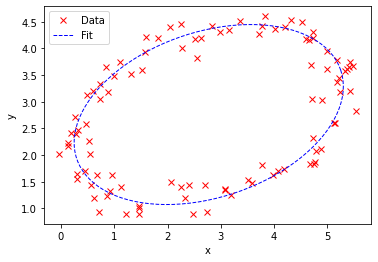

In [397]:
# plot of fit
fig,ax = plt.subplots()
ax.plot(x,y,'xr',label='Data')
ax.plot(*line([i.n for i in params]),'--b',lw=1,label='Fit')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

## Confidence interval/area

To visualize the accuracy of the fit, the region in which data points may validly lie within a given range of statistical confidence has to be establish, which is referred to as the confidence interval/area. This explanation is based on O’Leary & Zsombor-Murray, 2004.

The singular value $\sigma$ is the two-norm distance between the fit and the original data 
$$\sigma = \lVert\bf{r}\rVert_2 = \sqrt{\sum_{i=1}^N r_i^2}$$
with the fit having a residual standard deviation of $\delta_r = \sigma/\sqrt{N}$. The fitting procedure shown earlier gives a mean residual $\bar{r}$ of zero. Assuming the residual has a normal distribution, the conic equation can be rewritten as 

$$ax^2+bxy+cy^2+dx+ey+f = \aleph(0,\delta_r)$$ 

Note that $\aleph$ here refers to the normal distribution. In usual applications, the confidence interval is defined as a multiple $\mu$ of the standard deviation. This gives an expression for the confidence interval for the ellipse fit as
$$ax^2+bxy+cy^2+dx+ey+f \pm \frac{\mu\sigma}{\sqrt{N}} = 0$$

In [398]:
# obtaining the confidence interval/area for ellipse fit
def confidence_area(x,y,coeffs,f=1): # f here is the multiple of sigma
    c = coeffs
    res = c[0]*x**2 + c[1]*x*y + c[2]*y**2 + c[3]*x + c[4]*y + c[5]
    c_up = np.array([c[0],c[1],c[2],c[3],c[4],c[5] + f*np.std(res)])
    c_do = np.array([c[0],c[1],c[2],c[3],c[4],c[5] - f*np.std(res)])
    if convert(c_do) > convert(c_up):
        c_do, c_up = c_up,c_do
    return c_up,c_do

In [399]:
c_up, c_do = confidence_area(x,y,[i.n for i in params],f=2)
c_up, c_do

(array([-0.38132347,  0.35651649, -0.8529293 ,  1.1310537 ,  3.72028399,
        -3.65143635]),
 array([-0.38132347,  0.35651649, -0.8529293 ,  1.1310537 ,  3.72028399,
        -5.36797898]))

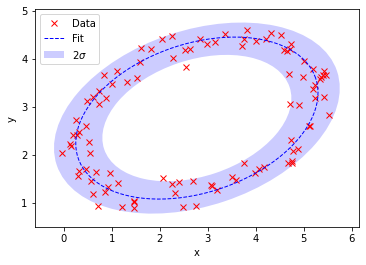

In [400]:
# plot of fit and confidence area
fig,ax = plt.subplots()
ax.plot(x,y,'xr',label='Data')
ax.plot(*line([i.n for i in params]),'--b',lw=1,label='Fit')
ax.add_patch(artist(c_up,ec='none',fc='b',alpha=0.2,label=r'2$\sigma$'))
ax.add_patch(artist(c_do,ec='none',fc='white'))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()